In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
plt.rc('font', family="Malgun Gothic")

In [5]:
tips = sns.load_dataset('tips')
tips 

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [6]:
tips['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [7]:
tips.groupby('day').count()

,total_bill,tip,sex,smoker,time,size
day,,,,,,
Thur,62,62,62,62,62,62
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76


In [8]:
tips.groupby('day').count()['total_bill']

day
Thur    62
Fri     19
Sat     87
Sun     76
Name: total_bill, dtype: int64

['Thur', 'Fri', 'Sat', 'Sun'] [62, 19, 87, 76]


<BarContainer object of 4 artists>

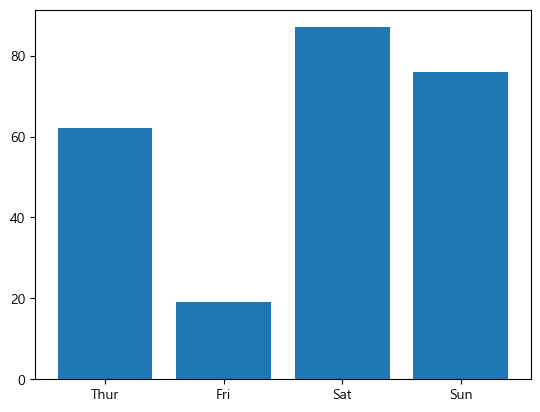

In [10]:
group = tips.groupby('day').count()['total_bill']
x = list(group.index)
y = list(group)
print(x, y)
plt.bar(x,y)

day
Thur    1096.33
Fri      325.88
Sat     1778.40
Sun     1627.16
Name: total_bill, dtype: float64
['Thur', 'Fri', 'Sat', 'Sun'] [1096.33, 325.88, 1778.4, 1627.16]


<Axes: >

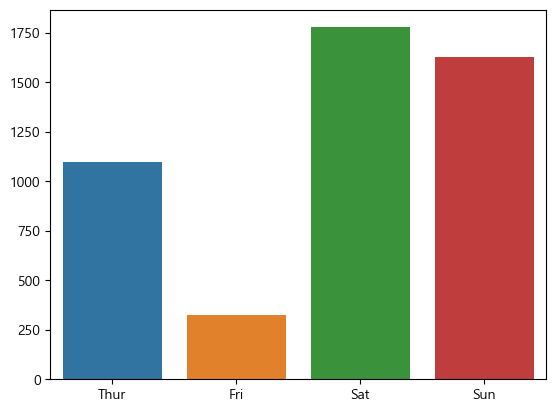

In [17]:
group = tips.groupby('day')['total_bill'].sum()
print( group )
x = list(group.index )
y = list(group )
print( x, y )
sns.barplot( x=x, y=y )

In [21]:
tips.groupby('day').describe()

total_bill                                                             \
          count       mean       std   min      25%    50%      75%    max   
day                                                                          
Thur       62.0  17.682742  7.886170  7.51  12.4425  16.20  20.1550  43.11   
Fri        19.0  17.151579  8.302660  5.75  12.0950  15.38  21.7500  40.17   
Sat        87.0  20.441379  9.480419  3.07  13.9050  18.24  24.7400  50.81   
Sun        76.0  21.410000  8.832122  7.25  14.9875  19.63  25.5975  48.17   

       tip            ...                 size                                \
     count      mean  ...     75%    max count      mean       std  min  25%   
day                   ...                                                      
Thur  62.0  2.771452  ...  3.3625   6.70  62.0  2.451613  1.066285  1.0  2.0   
Fri   19.0  2.734737  ...  3.3650   4.73  19.0  2.105263  0.567131  1.0  2.0   
Sat   87.0  2.993103  ...  3.3700  10.00  87.0  2.517241  0.819275  1.0  2.0   
Sun   76.0  3.255132  ...  4.0000   6.50  76.0  2.842105  1.007341  2.0  2.0   

                     
      50%  75%  max  
day                  
Thur  2.0  2.0  6.0  
Fri   2.0  2.0  4.0  
Sat   2.0  3.0  5.0  
Sun   2.0  4.0  6.0  

[4 rows x 24 columns]

<Axes: xlabel='day'>

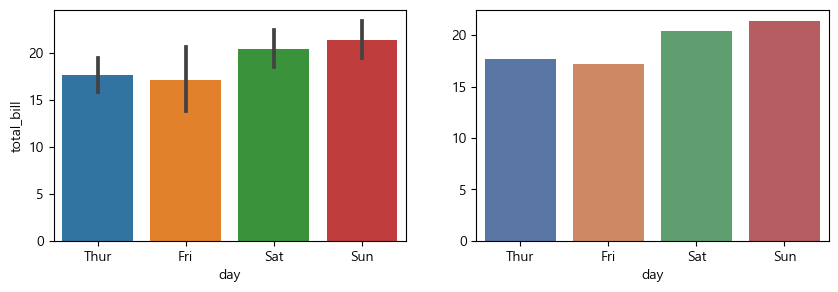

In [30]:
fig, axes = plt.subplots(1,2,figsize=(10,3))
sns.barplot(x='day', y='total_bill', data=tips, ax=axes[0])
data = tips.groupby('day').describe()['total_bill']['mean'];
x_data = data.index
x_data
y_data = list(data)
sns.barplot(x=x_data, y=y_data, palette="deep", ax = axes[1]) #palette 속성으로 이쁘게 색상 조정 가능

In [20]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [31]:
tips.groupby('day').describe()['total_bill']['mean']

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: mean, dtype: float64

### 1 relplot

In [32]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


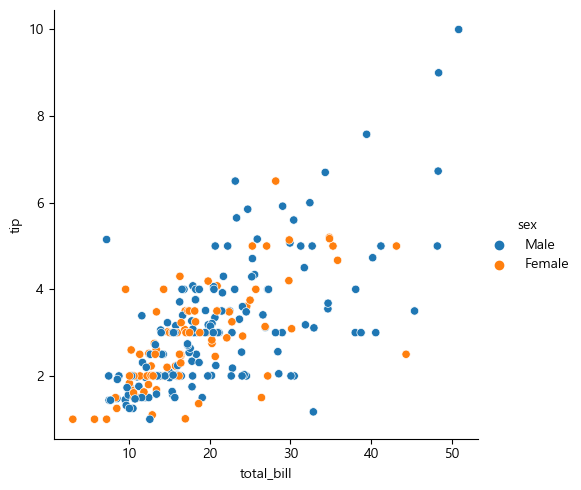

In [37]:
sns.relplot(x="total_bill", y="tip", hue="sex", data=tips)

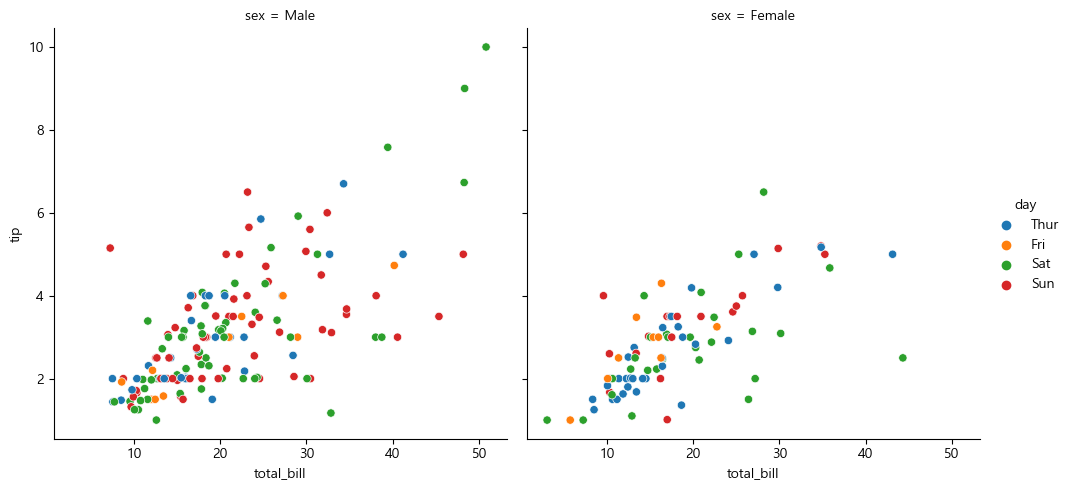

In [39]:
sns.relplot(x="total_bill", y="tip", hue="day", data=tips, col="sex")

### scatterplot

Text(0.5, 1.0, 'scatter plot')

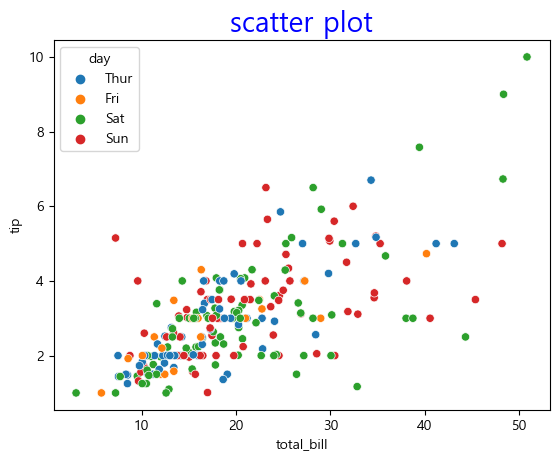

In [42]:
g=sns.scatterplot(x="total_bill", y="tip", hue="day", data=tips) # col 속성은 없음.
g.set_title("scatter plot", fontsize=20, color="blue")

### lineplot

<Axes: xlabel='total_bill', ylabel='tip'>

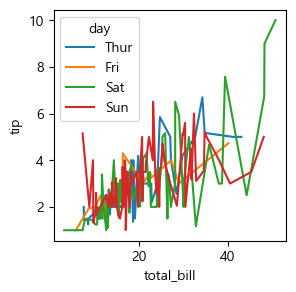

In [43]:
plt.subplots(figsize=(3,3))
sns.lineplot(x="total_bill", y="tip", hue="day", data=tips)

In [45]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Text(0.5, 1.0, 'DistPlot')

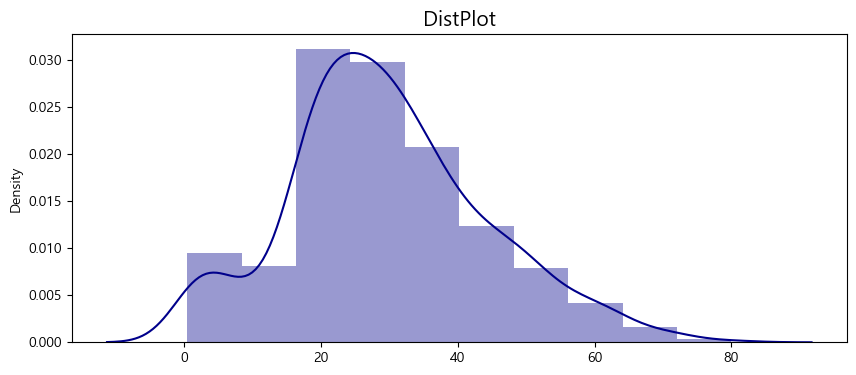

In [46]:
fig, ax = plt.subplots(figsize = (10,4))
g=sns.distplot(x=titanic['age'], color="darkblue", bins=10)
ax.set_title("DistPlot", fontsize=15)
#g, ax, plt 뭘 쓰든 동일하게 적용되니, 익숙한거로 사용하자.

Text(0.5, 1.0, 'Histplot')

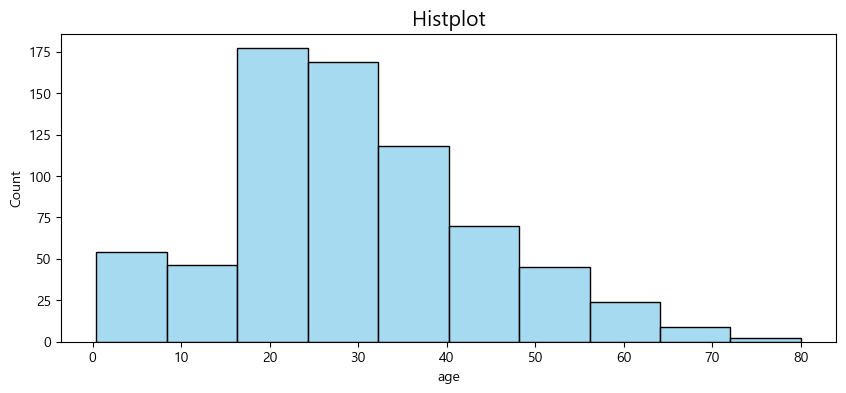

In [49]:
fig, ax = plt.subplots(figsize = (10,4))
g=sns.histplot(x=titanic['age'], color="skyblue", bins=10)
ax.set_title("Histplot", fontsize=15)

<Axes: xlabel='day', ylabel='total_bill'>

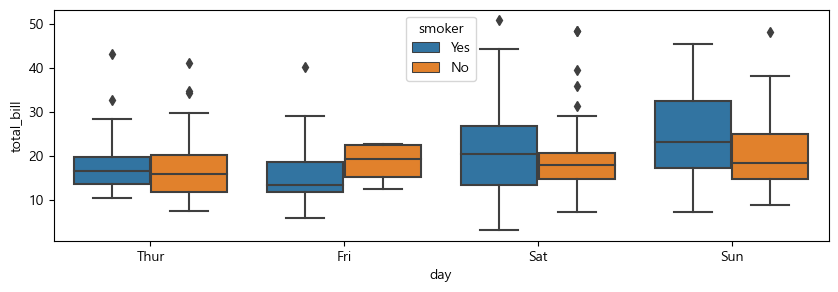

In [50]:
plt.subplots(figsize=(10,3))
sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips)

## 히트맵

In [55]:
#상관관계를 표현해준다.
# 0.7 이상이면 어느정도 관계가 있으며 , 0.3 이하이면 관계가 없다고 표현
tips.corr(numeric_only=True)


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

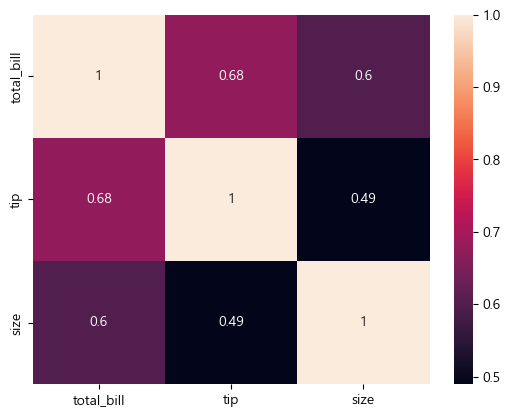

In [58]:
sns.heatmap(tips.corr(numeric_only = True), annot=True)